# If we were to be video game developers, what factors should we consider to maximize global sales?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb; sb.set_theme(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
sb.set()

In [2]:
gamesData = pd.read_csv('sales.csv')
gamesData.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## We removed games from before 2002 as it might be outdated and irrelevant

In [3]:
gamesData['below2002'] = np.where(gamesData['Year_of_Release']  < 2002.0 ,np.nan , False)
gamesData.dropna(subset=['below2002'], inplace=True)
gamesData.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,below2002
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,0.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,0.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E,0.0
10,Nintendogs,DS,2005.0,Simulation,Nintendo,9.05,10.95,1.93,2.74,24.67,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E,0.0
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E,0.0
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E,0.0


## We filled the empty values with 0 for the quantitative values as to preserve it for use, and N/A for qualitative values

In [4]:
gamesData["Critic_Score"].fillna(value = 0, inplace = True)
gamesData["Critic_Count"].fillna(value = 0, inplace = True)
gamesData["User_Score"].fillna(value = 0, inplace = True)
gamesData['User_Score'].replace('tbd', 0, inplace=True)
gamesData["User_Count"].fillna(value = 0, inplace = True)
gamesData["Developer"].fillna(value = "N/A", inplace = True)
gamesData["Rating"].fillna(value = "N/A", inplace = True)
gamesData['User_Score'] = gamesData['User_Score'].astype('float')
gamesData.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,below2002
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,0.0
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,0.0
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,0.0


## Removal of outliers from Global Sales

In [35]:
gamesData = pd.DataFrame(gamesData[["Genre", "Critic_Score", "Critic_Count", "User_Score", "Global_Sales", "Publisher", "Platform","Year_of_Release"]]).copy()

# Calculate the quartiles
Q1 = gamesData.quantile(0.25)
Q3 = gamesData.quantile(0.75)

# Rule to identify outliers
rule = ((gamesData < (Q1 - 1.5 * (Q3 - Q1))) | (gamesData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

C:\Users\dobin001\AppData\Local\Temp/ipykernel_19060/3248969249.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((gamesData < (Q1 - 1.5 * (Q3 - Q1))) | (gamesData > (Q3 + 1.5 * (Q3 - Q1))))


Critic_Count       302
Critic_Score         0
Genre                0
Global_Sales       458
Platform             0
Publisher            0
User_Score           0
Year_of_Release      0
dtype: int64

In [32]:
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
outliers

# How many points are outliers for the two variables combined?
outliers.value_counts()

# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

# Remove outliers based on the row indices above
gamesData.drop(axis = 0, index = outlierindices, inplace = True)

## Summary for type of Genres

Number of Genres : 12
Action          2636
Sports          1622
Misc            1442
Adventure       1136
Role-Playing    1079
Shooter          837
Racing           818
Simulation       671
Platform         547
Fighting         524
Strategy         498
Puzzle           436
Name: Genre, dtype: int64


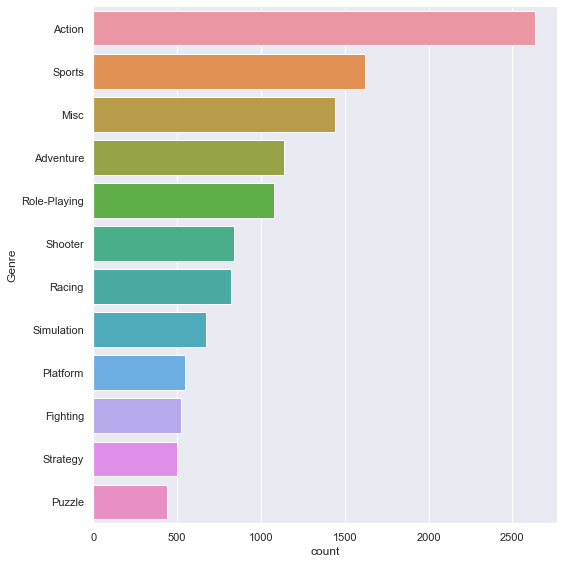

In [7]:
print("Number of Genres :", len(gamesData["Genre"].dropna().unique()))

print(gamesData["Genre"].dropna().value_counts())

sb.catplot(y = "Genre", data = gamesData, kind = "count", height = 8, order=gamesData['Genre'].value_counts().index)

## Top 10 most games published Publishers

In [8]:
print("Number of Unique Publisher :", len(gamesData["Publisher"].dropna().unique()))

print(gamesData["Publisher"].dropna().value_counts().head(10))

Number of Unique Publisher : 434
Electronic Arts                 873
Namco Bandai Games              791
Ubisoft                         744
Activision                      741
Konami Digital Entertainment    600
THQ                             566
Sega                            430
Sony Computer Entertainment     351
Tecmo Koei                      303
Take-Two Interactive            297
Name: Publisher, dtype: int64


## Types of platform

Number of Unique Platforms : 19
DS      2010
PS2     1620
Wii     1157
PSP     1150
PS3     1079
X360     950
PC       849
XB       731
GBA      659
GC       495
3DS      463
PSV      418
PS4      308
XOne     191
WiiU     120
PS        25
2600      14
N64        4
DC         3
Name: Platform, dtype: int64


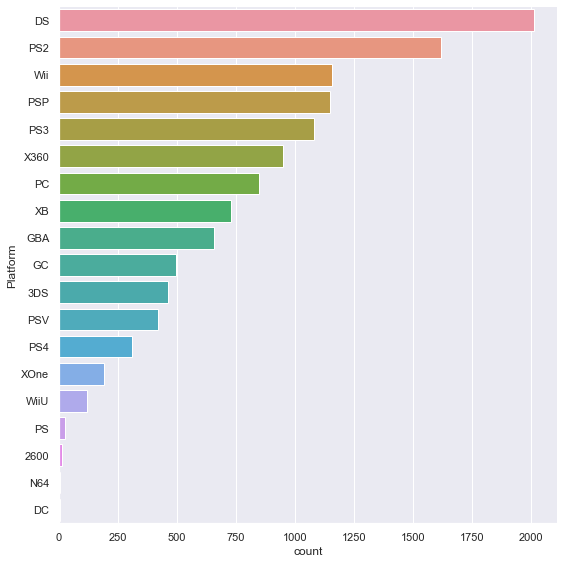

In [9]:
print("Number of Unique Platforms :", len(gamesData["Platform"].dropna().unique()))

print(gamesData["Platform"].dropna().value_counts())

sb.catplot(y = "Platform", data = gamesData, kind = "count", height = 8, order=gamesData['Platform'].value_counts().index)

## No. of games released per year

2009.0    1286
2008.0    1253
2010.0    1112
2007.0    1047
2011.0    1010
2006.0     904
2005.0     839
2002.0     733
2003.0     678
2004.0     650
2012.0     555
2015.0     535
2014.0     495
2016.0     459
2013.0     444
2017.0       3
Name: Year_of_Release, dtype: int64


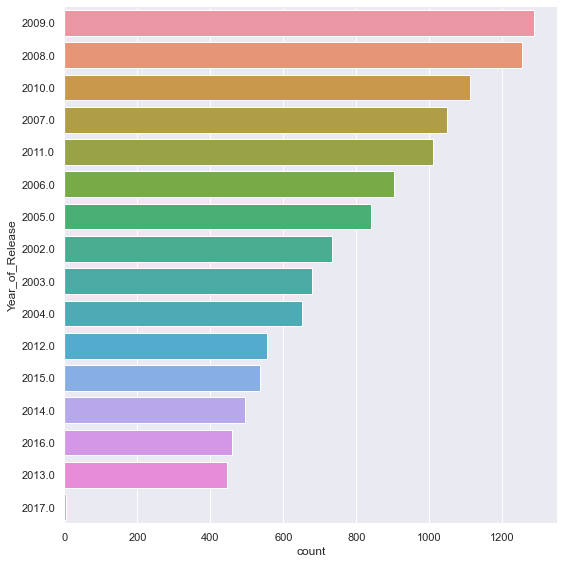

In [10]:
print(gamesData["Year_of_Release"].dropna().value_counts())
sb.catplot(y = "Year_of_Release", data = gamesData, kind = "count", height = 8, order=gamesData['Year_of_Release'].value_counts().index)

## Global Sales based on Genre

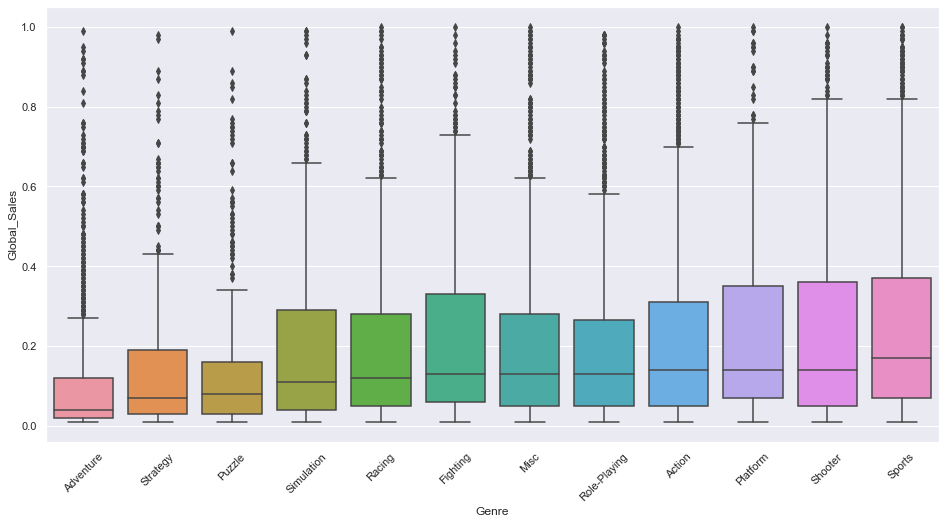

In [11]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Genre', y = 'Global_Sales', data = gamesData, 
           order = gamesData.groupby('Genre')['Global_Sales'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Global sales based on Publisher

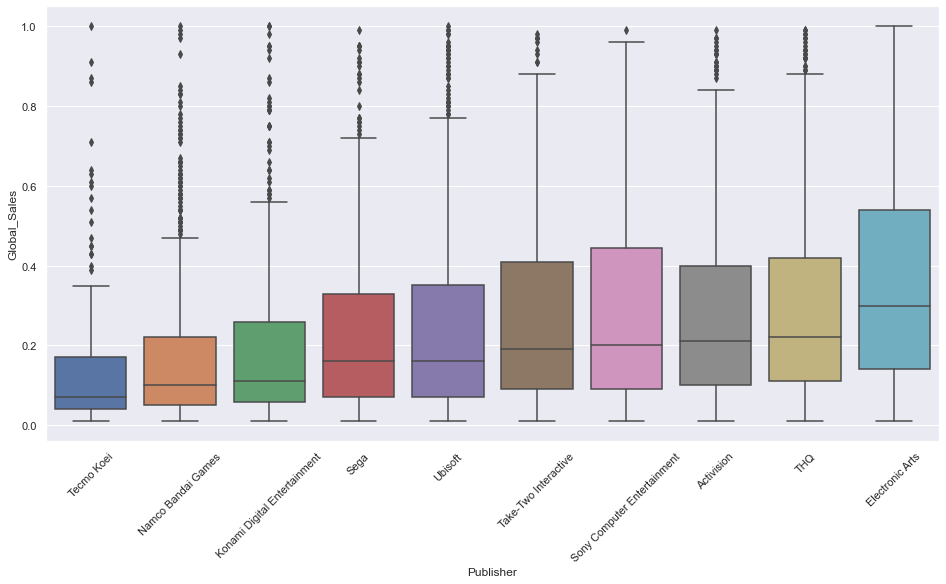

In [12]:
pubData = pd.DataFrame(gamesData[["Publisher","Global_Sales"]]).copy()

pubData["Top"] = np.where((pubData['Publisher'] == 'Electronic Arts') | (pubData['Publisher'] == 'Namco Bandai Games')
                          | (pubData['Publisher'] == 'Ubisoft') | (pubData['Publisher'] == 'Activision')
                          | (pubData['Publisher'] == 'Konami Digital Entertainment') | (pubData['Publisher'] == 'THQ')
                          | (pubData['Publisher'] == 'Sega') | (pubData['Publisher'] == 'Sony Computer Entertainment')
                          | (pubData['Publisher'] == 'Tecmo Koei') | (pubData['Publisher'] == 'Take-Two Interactive'),True, np.nan)

pubData.dropna(subset=["Top"], inplace=True)

f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Publisher', y = 'Global_Sales', data = pubData, 
           order = pubData.groupby('Publisher')['Global_Sales'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Global Sales based on Platform

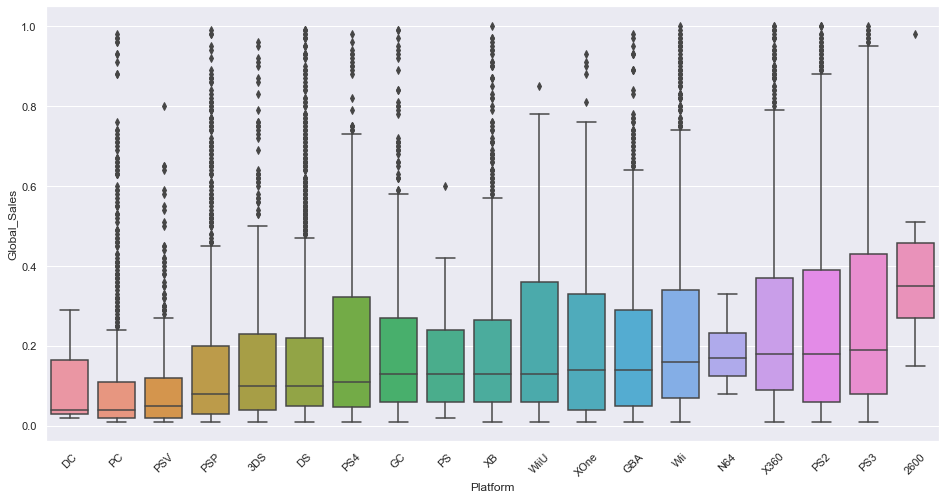

In [13]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Platform', y = 'Global_Sales', data = gamesData, 
           order = gamesData.groupby('Platform')['Global_Sales'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

## Critic Score vs Global Sales

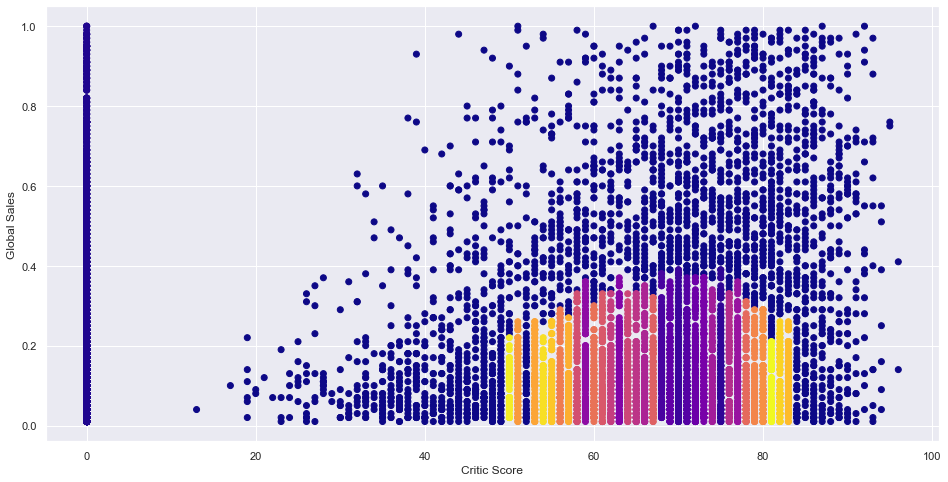

Estimated number of clusters: 34
Estimated number of noise points: 2674


In [14]:
from sklearn.neighbors import NearestNeighbors # importing the library
from sklearn.cluster import DBSCAN

f, axes = plt.subplots(1, 1, figsize=(16, 8))
x = gamesData.loc[:, ['Critic_Score','Global_Sales']].values

neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x) # finding the nearest neighbours

# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.1, min_samples = 50).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Critic Score") # X-axis label
plt.ylabel("Global Sales") # Y-axis label
plt.show() # showing the plot

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# User_Score & Critic_Score VS Global_Sales using Machine Learning

In [15]:
rawData = pd.read_csv('sales.csv')
naDropped = rawData.dropna(subset=["Name", "Platform", "Year_of_Release", "Genre", "Publisher", "NA_Sales", 
                                   "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales", "Critic_Score", 
                                   "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"])

In [16]:
netData = pd.DataFrame(naDropped[["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Global_Sales"]]).copy()

Q1 = netData.quantile(0.25)
Q3 = netData.quantile(0.75)
rule = ((netData < (Q1 - 1.5 * (Q3 - Q1))) | (netData > (Q3 + 1.5 * (Q3 - Q1))))
outliers = rule.any(axis = 1)
outliers.value_counts()
outlierindices = outliers.index[outliers == True]
netData.drop(axis = 0, index = outlierindices, inplace = True)

s = netData['Global_Sales'].quantile(0.85)
netData['Successful'] = (netData['Global_Sales'] >= s)

netData.head(810)

C:\Users\dobin001\AppData\Local\Temp/ipykernel_19060/3607325086.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((netData < (Q1 - 1.5 * (Q3 - Q1))) | (netData > (Q3 + 1.5 * (Q3 - Q1))))


,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales,Successful
1042,89.0,25.0,8.9,43.0,1.71,True
1043,84.0,57.0,9.1,81.0,1.71,True
1044,83.0,25.0,8.7,35.0,1.71,True
1053,87.0,18.0,8.6,23.0,1.70,True
1054,74.0,17.0,5.3,77.0,1.70,True
...,...,...,...,...,...,...
2742,59.0,42.0,6.5,61.0,0.75,True
2743,80.0,47.0,6.9,106.0,0.75,True
2746,54.0,45.0,7.1,57.0,0.74,False
2747,76.0,45.0,5.7,9.0,0.74,False


In [17]:
# Extracting Response and Predictors
p = pd.DataFrame(netData[["Critic_Score", "User_Score"]])
r = pd.DataFrame(netData["Successful"])
test = pd.DataFrame(netData["Global_Sales"])
test.describe()

,Global_Sales
count,5374.000000
mean,0.372657
std,0.369865
min,0.010000
25%,0.100000
50%,0.240000
75%,0.520000
max,1.710000


In [18]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Split the Dataset into Train and Test
p_train, p_test, r_train, r_test = train_test_split(p, r, test_size = 0.33)

# Check the sample sizes
print("Train Set :", r_train.shape, p_train.shape)
print("Test Set  :", r_test.shape, p_test.shape)

Train Set : (3600, 1) (3600, 2)
Test Set  : (1774, 1) (1774, 2)


In [19]:
# Summary Statistics for Response
r_train["Successful"].value_counts()

False    3050
True      550
Name: Successful, dtype: int64

In [20]:
# Summary Statistics for Predictors
p_train.describe(include = 'all')

,Critic_Score,User_Score
count,3600.000000,3600
unique,NaN,82
top,NaN,7.8
freq,NaN,163
mean,68.447500,NaN
std,12.372473,NaN
min,35.000000,NaN
25%,60.000000,NaN
50%,70.000000,NaN
75%,78.000000,NaN


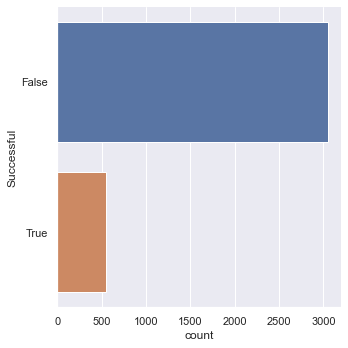

In [21]:
# Draw the distribution of Response
sb.catplot(y = "Successful", data = r_train, kind = "count")

[Text(418.5, 713.475, 'Critic_Score <= 74.5\ngini = 0.259\nsamples = 3600\nvalue = [3050, 550]\nclass = Unsuccessful'),
 Text(209.25, 509.625, 'Critic_Score <= 68.5\ngini = 0.173\nsamples = 2317\nvalue = [2096, 221]\nclass = Unsuccessful'),
 Text(104.625, 305.775, 'Critic_Score <= 51.5\ngini = 0.14\nsamples = 1608\nvalue = [1486, 122]\nclass = Unsuccessful'),
 Text(52.3125, 101.92499999999995, 'gini = 0.09\nsamples = 404\nvalue = [385, 19]\nclass = Unsuccessful'),
 Text(156.9375, 101.92499999999995, 'gini = 0.156\nsamples = 1204\nvalue = [1101, 103]\nclass = Unsuccessful'),
 Text(313.875, 305.775, 'User_Score <= 7.55\ngini = 0.24\nsamples = 709\nvalue = [610, 99]\nclass = Unsuccessful'),
 Text(261.5625, 101.92499999999995, 'gini = 0.292\nsamples = 361\nvalue = [297, 64]\nclass = Unsuccessful'),
 Text(366.1875, 101.92499999999995, 'gini = 0.181\nsamples = 348\nvalue = [313, 35]\nclass = Unsuccessful'),
 Text(627.75, 509.625, 'Critic_Score <= 82.5\ngini = 0.381\nsamples = 1283\nvalue = [

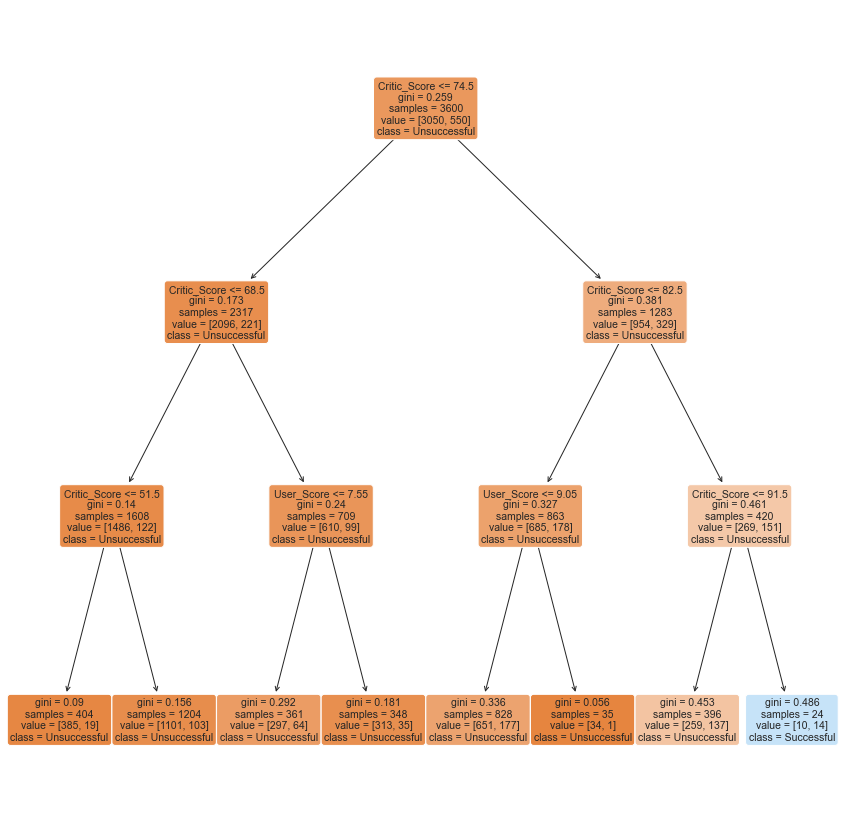

In [22]:
dectree.fit(p_train, r_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(15,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=p_train.columns, 
          class_names=["Unsuccessful","Successful"])

In [23]:
# Extract Response and Predictors
predictors = ["Critic_Score", "User_Score"]

r = pd.DataFrame(netData['Successful'])
p = pd.DataFrame(netData[predictors]) 

# Split the Dataset into Train and Test
p_train, p_test, r_train, r_test = train_test_split(p, r, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(p_train, r_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
r_train_pred = dectree.predict(p_train)
r_test_pred = dectree.predict(p_test)

# Extract Predictors for Prediction
p_pred = pd.DataFrame(netData[predictors])

# Predict Response corresponding to Predictors
r_pred = dectree.predict(p_pred)
r_pred

array([False, False, False, ..., False, False, False])

In [24]:
# Summarize the Actuals and Predictions
r_pred = pd.DataFrame(r_pred, columns = ["Pred_Successful"], index = netData.index)
netData_acc = pd.concat([netData[["Critic_Score", "User_Score", "Successful"]], r_pred], axis = 1)
netData_acc['Correct Guess'] = (netData_acc["Successful"] == netData_acc["Pred_Successful"])
netData_acc

,Critic_Score,User_Score,Successful,Pred_Successful,Correct Guess
1042,89.0,8.9,True,False,False
1043,84.0,9.1,True,False,False
1044,83.0,8.7,True,False,False
1053,87.0,8.6,True,False,False
1054,74.0,5.3,True,False,False
...,...,...,...,...,...
16654,81.0,8.5,False,False,True
16665,46.0,2.4,False,False,True
16675,81.0,8.8,False,False,True
16698,61.0,5.8,False,False,True


In [25]:
netData_acc['Correct Guess'].value_counts()

True     4569
False     805
Name: Correct Guess, dtype: int64

In [27]:
print(4569/(4569 + 805), "% of predictions were correct.")

0.8502046892445106 % of predictions were correct.
